# Chemometrics
<br>
**Julien Wist / 2017 / Universidad del Valle**
<br>
**Andrés Bernal / 2017 / ???**

An up-to-date version of this notebook can be found here: https://github.com/jwist/chemometrics/

In [2]:
options(repr.plot.width=4, repr.plot.height=4) # change these setting to plot larger figures

## dependance and correlation and orthogonality

We should try to explain the difference in results we obtained by scaling the data in this simple example. The main question we want to answer with this example is precisely about the importance of the IVs (temperature, pH, concentration and the intereaction terms). The fact that such a difference, not only in magnitude but also in trends (the ranking of importance is not maintained) call for a more thorough explanation.

Consider the following function: $y=x^2$

[1] -0.08530064


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  x and y
X-squared = 39800, df = NA, p-value = 0.0004998


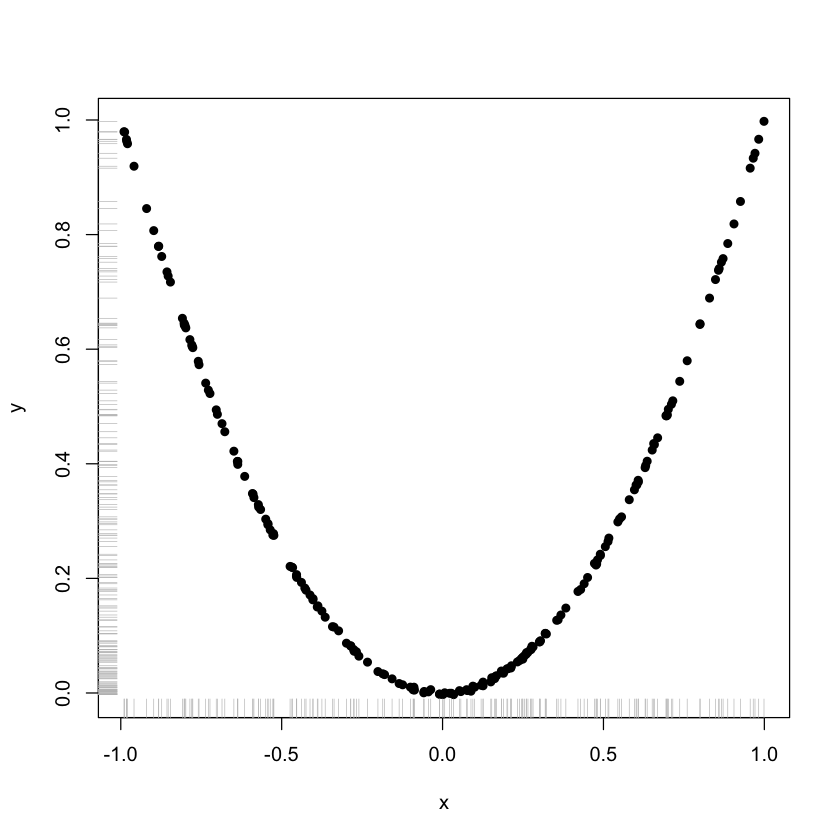

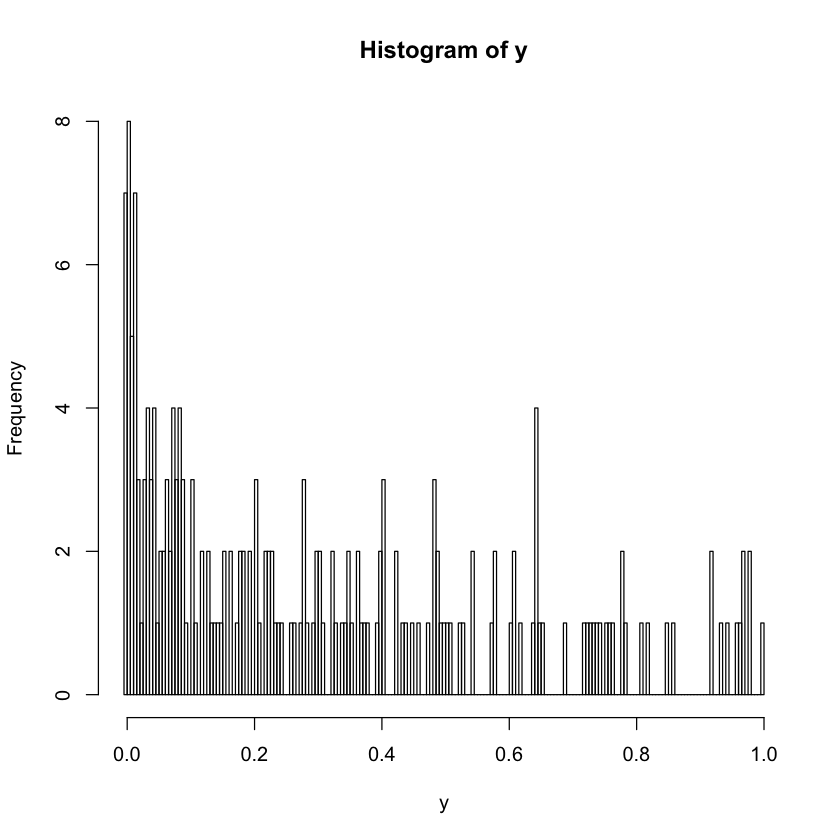

In [15]:
x <- runif(200, min = -1, max = 1)
y <- x^2 + rnorm(200, sd = 0.002)
plot(x,y,pch=16)
rug(x,side=1,col="grey")
rug(y,side=2,col="grey")
cor(x,y)
chisq.test(x,y, simulate.p.value = TRUE)
d1 <- hist(y, breaks = 200, right=FALSE, plot = FALSE)
plot(d1)

and compare it with $y=x$

[1] 1


	Pearson's Chi-squared test with simulated p-value (based on 2000
	replicates)

data:  x and y
X-squared = 39800, df = NA, p-value = 0.0004998


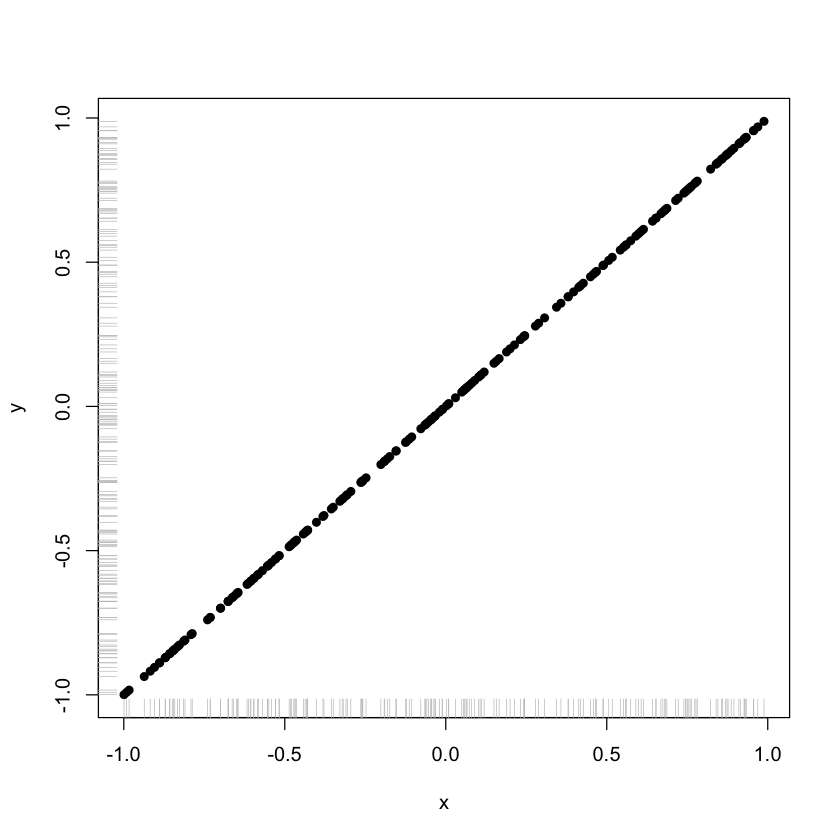

In [2]:
x <- runif(200,min=-1,max=1)
y <- x
plot(x,y,pch=16)
rug(x,side=1,col="grey")
rug(y,side=2,col="grey")
cor(x,y)
chisq.test(x,y, simulate.p.value = TRUE) 

Despite in both cases $x$ and $y$ are dependent, in the left case they are completely uncorrelated. So being uncorrelated is not the same as being independent, but independant variables are uncorrelated. Two variables are considered independent when their joint probability distribution is equal to the product of their individual marginal probability distributions: $$P_{X,Y}(x,y)=P_X(x)P_Y(y)$$

Two variables are uncorrelated when their correlation coefficient is zero or when their covariance is equal to zero.

### correlations in experimental design

Experimental design is all about designing an experiment where the IV are uncorrelated so that effect of each IV can be studied separately. Then, by definition we can assume that IV are uncorrelated. You can check this for our chemical data. For example the correlation between pH and temperature is `r cor(datas$ph, datas$temp)`, while the correlation between ph and pH$\times$T is `r cor(datas$ph,datas$phTemp)`, non zero as expected.

if we look at the data for example for example for temperature and concentration we might have `r d[2,2:3]` and `r d[3,2:3]` for second and third point. If we represent them as vectors, we can see that both vectors are somehow collinear and that the product of both vectors is even more collinear.

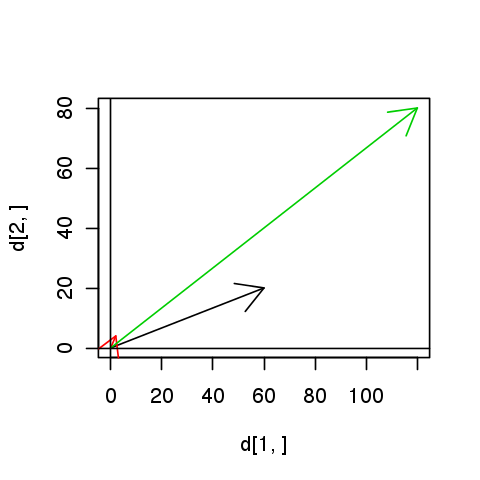

In [5]:
d <- c(6,60,4,34.841,6,60,2,16.567,6,20,4,45.396,6,20,2,27.939,4,60,4,19.825,4,60,2,1.444,4,20,4,37.673,4,20,2,23.131,6,40,3,23.088,4,40,3,12.325,5,60,3,16.461,5,20,3,33.489,5,40,4,26.189,5,40,2,8.337,5,40,3,19.192,5,40,3,16.579,5,40,3,17.794,5,40,3,16.65,5,40,3,16.799,5,40,3,16.635)
dim(d) <- c(4,20) # we force the data into a mtrix of dimension 4 x 20
# we create the data frame

plot(d[1,],d[2,], ylim=c(0,80), xlim=c(0,120),type='n')
for (i in 2) {
  arrows(x0=0, y0=0, x1=d[2,i], y1=d[2,i+1])
  arrows(x0=0, y0=0, x1=d[3,i], y1=d[3,i+1],col=2)
  arrows(x0=0, y0=0, x1=d[3,i]*d[2,i], y1=d[3,i+1]*d[2,i+1],col=3)
}
abline(0,0)
abline(v=0)

Now, if we scale / encode these data and draw again their vector we observe that they became orthogonal. So the collinearity has been reduced by proper scaling.


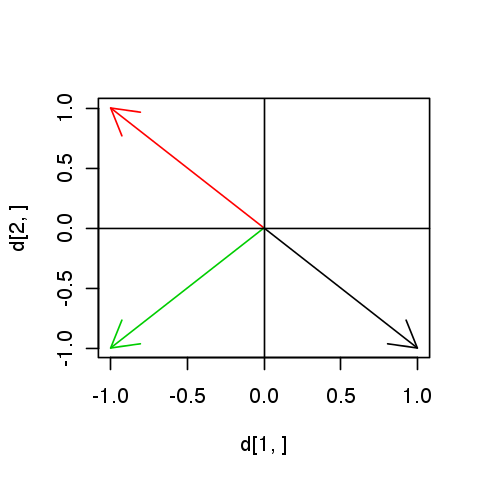

In [6]:
# scale with y <- (2*x - max(x) - min(x)) / (max(x)-min(x))
maxs <- apply(d[1:3,],1,max); mins <- apply(d[1:3,],1,min)
d[1:3,] <- t( scale(t(d)[,1:3],center = (mins + maxs)/2, scale = (maxs - mins)/2) )

plot(d[1,],d[2,], ylim=c(-1,1), xlim=c(-1,1),type='n')
for (i in 2) {
  arrows(x0=0, y0=0, x1=d[2,i], y1=d[2,i+1])
  arrows(x0=0, y0=0, x1=d[3,i], y1=d[3,i+1],col=2)
  arrows(x0=0, y0=0, x1=d[3,i]*d[2,i], y1=d[3,i+1]*d[2,i+1],col=3)
}
abline(0,0)
abline(v=0)

Collinearity should be avoided because it causes overfitting. The goal of a regression is to find the best variables (IVs) than explain most of the variance in the dependent variable (DV). This is usually measured by the explained variance, $R^2$, parameter. Too many collinear predictors may lead to high values of $R^2$ without the resulting model being necessarily useful. Collinear predictors are poor at describing the whole variable space. For example, we can find a best line that passes close to three points in space. If points are close, the error may be much larger, without incrementing the residuals, than if the three points are spread over a large distance. 

In addition, in the case of collinear variable, it will be difficult to rank them according to their importance to explain variance. Indeed the importance of a variable will depend on the order in which the variable are taken into account. If one vector explains a lot of variance, a collinear predictor that follow will not be able to explain anymore variance and will thus be discarded, although it contains important information.

<div class="ref">
http://creative-wisdom.com/computer/sas/collinear.html
</div>

<img src="https://raw.githubusercontent.com/jwist/chemometrics/master/img/stepwise1.gif" width="200"><img src="https://raw.githubusercontent.com/jwist/chemometrics/master/img/stepwise2.gif" width="200">

This is best illustrated by the above figures. In one case, each variable will explain its part of variance, while in the second case, several variable explain "the same" bit of variance.

### high number of variable

Imagine for a moment that the number of available variables (predictors) is much higher that the number of observation. In this case, the degree of freedom will become negative, that is the system lacks degrees of freedom, a situation which is referred to as overfitting. It is thus necessary to reduce the number of variables a task that is achieved by step-wise regression, etc. The general principles behind these methods consists in performing regressions with different combinations of variables in order to find out the ones to keep. 

However there are others and more robust alternatives to these methods that aknowledge the redundancy of information spanned by collinear predictors and try to convert collinearity of predictors (an issue) into reliability (a plusvalue). Such methods, as PLS (Projection to Latent Structure, a.k.a Partial Least Square), seek projecting predictors into composit variables to better explain the structure of the response. Moreover, PLS focuses on prediction, rather than fit, and is inherently weak at posterior interpretation of the relevant variables (this is also known as soft-modeling). Such methods also forms the domain of multivariate analysis, which should not be confused with multiple regression or multiple variable analysis. 